# Simple Linear Regression Example

This example uses the diabetes data from Sklearn in order to train a linear regression model. The data contains ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

Attribute information: 
- ***age*** age in years
- ***sex*** sex of the person in question
- ***bmi*** body mass index
- ***bp*** average blood pressure
- ***s1*** tc, total serum cholesterol
- ***s2*** ldl, low-density lipoproteins
- ***s3*** hdl, high-density lipoproteins
- ***s4*** tch, total cholesterol / HDL
- ***s5*** ltg, possibly log of serum triglycerides level
- ***s6*** glu, blood sugar level

The model (linear algebra) is `Ax = b`, where length of `x` is 10+1 due to the bias term. 

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # Reduce TF verbosity
import tensorflow as tf
tf.get_logger().setLevel('INFO') # Reduce TF verbosity
print(f"tensorflow version: {tf.__version__}")

import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

tensorflow version: 2.6.0


In [2]:
data = load_diabetes()

print(f"Type of data: {type(data)}")
print(f"Keys: {data.keys()}")
print(f"Feature names: {data.feature_names}")
print(f"Size of data.data: {data.data.shape}")
print(f"Size of data.target: {data.target.shape}")
N, D = data.data.shape

Type of data: <class 'sklearn.utils.Bunch'>
Keys: dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Size of data.data: (442, 10)
Size of data.target: (442,)


In [3]:
X = data.data
# Normalize X
X -= X.mean()
y = data.target

# Sprint input features and target into train- and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [4]:
# Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1)
])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Learning rate scheduler
def learning_rate(epoch, lr):
    if epoch >= 50:
        return 0.001
    return 0.01

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(learning_rate)

model.compile(
    tf.keras.optimizers.SGD(0.01, 0.9),
    loss='mse'
)

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, callbacks=[lr_scheduler])

Epoch 1/200
10/10 [==============================] - 1s 12ms/step - loss: 20763.7305 - val_loss: 7631.2124
Epoch 2/200
10/10 [==============================] - 0s 4ms/step - loss: 7124.8657 - val_loss: 7131.0146
Epoch 3/200
10/10 [==============================] - 0s 4ms/step - loss: 8082.7524 - val_loss: 5728.5815
Epoch 4/200
10/10 [==============================] - 0s 4ms/step - loss: 6128.6699 - val_loss: 5094.8740
Epoch 5/200
10/10 [==============================] - 0s 4ms/step - loss: 6210.7622 - val_loss: 5229.9570
Epoch 6/200
10/10 [==============================] - 0s 4ms/step - loss: 6007.0537 - val_loss: 4910.6616
Epoch 7/200
10/10 [==============================] - 0s 4ms/step - loss: 5845.8330 - val_loss: 4840.8696
Epoch 8/200
10/10 [==============================] - 0s 4ms/step - loss: 5770.9121 - val_loss: 4779.5679
Epoch 9/200
10/10 [==============================] - 0s 4ms/step - loss: 5704.8477 - val_loss: 4731.2090
Epoch 10/200
10/10 [==============================] -

Epoch 155/200
10/10 [==============================] - 0s 4ms/step - loss: 3937.5417 - val_loss: 3269.4170
Epoch 156/200
10/10 [==============================] - 0s 4ms/step - loss: 3936.7268 - val_loss: 3268.9556
Epoch 157/200
10/10 [==============================] - 0s 4ms/step - loss: 3935.4526 - val_loss: 3268.1506
Epoch 158/200
10/10 [==============================] - 0s 5ms/step - loss: 3933.9827 - val_loss: 3268.4255
Epoch 159/200
10/10 [==============================] - 0s 4ms/step - loss: 3933.6389 - val_loss: 3268.1709
Epoch 160/200
10/10 [==============================] - 0s 4ms/step - loss: 3933.2229 - val_loss: 3267.0994
Epoch 161/200
10/10 [==============================] - 0s 4ms/step - loss: 3933.3147 - val_loss: 3263.9331
Epoch 162/200
10/10 [==============================] - 0s 4ms/step - loss: 3928.1833 - val_loss: 3262.7026
Epoch 163/200
10/10 [==============================] - 0s 4ms/step - loss: 3927.6917 - val_loss: 3260.9031
Epoch 164/200
10/10 [================

In [6]:
# Print values of the weights
for layer in model.layers:
    print(f"Layer weights: {layer.weights}")
    print(f"Layer bias: {layer.bias}")

Layer weights: [<tf.Variable 'dense/kernel:0' shape=(10, 1) dtype=float32, numpy=
array([[  37.472744 ],
       [  -4.351261 ],
       [ 197.19902  ],
       [ 154.9576   ],
       [  19.129047 ],
       [   6.7348456],
       [-131.22763  ],
       [ 120.71107  ],
       [ 180.50064  ],
       [ 127.55395  ]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([151.90167], dtype=float32)>]
Layer bias: <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([151.90167], dtype=float32)>


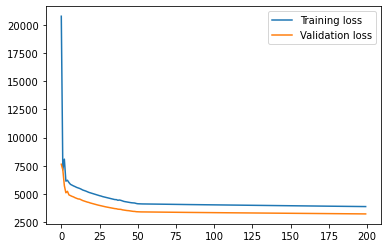

In [7]:
# Plot the loss
plt.plot(r.history['loss'], label='Training loss')
plt.plot(r.history['val_loss'], label='Validation loss')
plt.legend()

In [8]:
print(f"Model evaluation: {model.evaluate(X_test, y_test)}")

5/5 [==============================] - 0s 1ms/step - loss: 3222.1924
Model evaluation: 3222.1923828125
